In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

input_file = ''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        input_file = os.path.join(dirname, filename)
        print(input_file)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-grade-prediction/student-mat.csv


## Important Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [4]:
data = pd.read_csv(input_file)

data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Preprocessing data

### step 1: encoding non-numeric values

In [7]:
non_numeric_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                       'nursery', 'higher', 'internet', 'romantic']

# One-Hot Encoding
data_one_hot = pd.get_dummies(data, columns=non_numeric_columns)

# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_label_encoded = data.copy()
for column in non_numeric_columns:
    data_label_encoded[column] = label_encoder.fit_transform(data_label_encoded[column])

# Display the encoded data
print("One-Hot Encoded Data:")
print(data_one_hot.head())

print("\nLabel Encoded Data:")
print(data_label_encoded.head())


One-Hot Encoded Data:
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0     1  ...           True           False       False         True   
1     1  ...           True           False        True        False   
2     2  ...           True           False       False         True   
3     1  ...          False            True       False         True   
4     1  ...           True           False       False         True   

   higher_no  higher_yes  internet_no  internet_yes  romantic_no

In [8]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
data_one_hot

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,True,False,False,True,False,True,True,False,True,False
391,17,3,1,2,1,0,2,4,5,3,...,True,False,True,False,False,True,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,...,True,False,True,False,False,True,True,False,True,False
393,18,3,2,3,1,0,4,4,1,3,...,True,False,True,False,False,True,False,True,True,False


In [12]:
data_label_encoded

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [13]:
data = data_label_encoded


### Split Data into X and y features

`X` will be a matrix of features while `y` will be a column vector of target attribute `G3`

In [16]:
y = data['G3'].copy()
X = data.drop('G3', axis=1).copy()
y


0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

## Visualizing data

### Visualize correlation of features with final grade(g3)

### 1. heat map

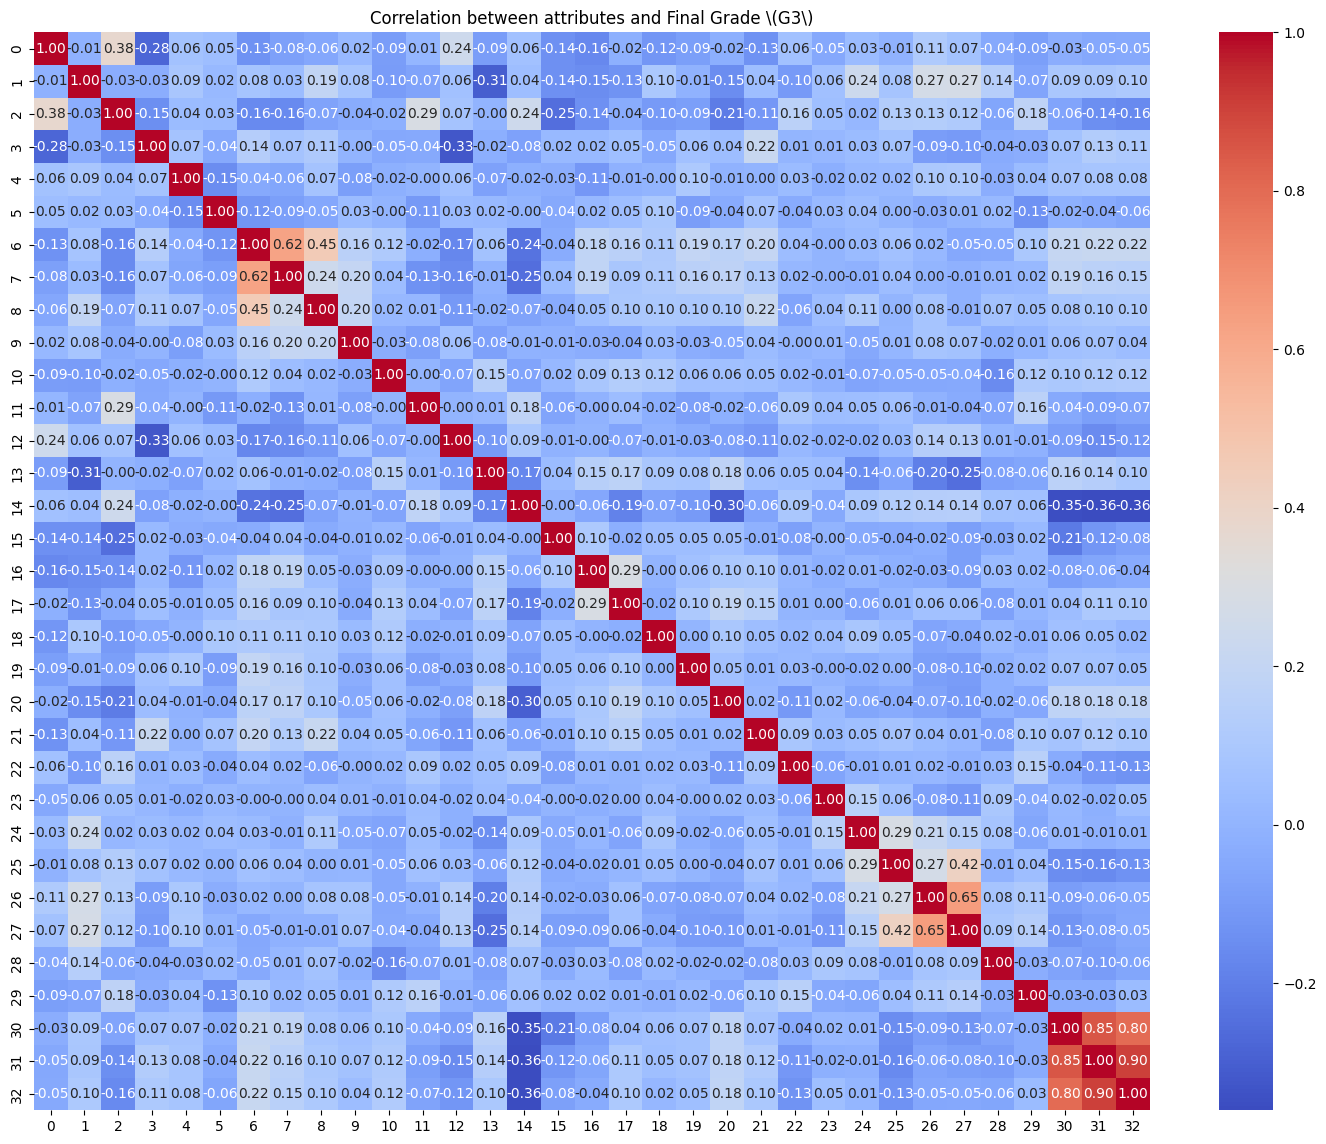

In [35]:
plt.figure(figsize=(18,14))

# do correlation matrix of X transpose and y
correlation_matrix = np.corrcoef(X.T, y)

# use that to do heatmap with seaborn library
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between attributes and Final Grade \(G3\)')
plt.show()

### 2. Scatter plot of individual features

In [29]:
# Select top 6 features with highest correlation with G3
# G3 is excluded from the correlation calculation
correlations = data.drop(columns=['G3']).corrwith(data['G3'])

# Select top-k features (excluding G3) with highest absolute correlation coefficients
top_k_features = correlations.abs().nlargest(6)
print(top_k_features)

G2          0.904868
G1          0.801468
failures    0.360415
Medu        0.217147
higher      0.182465
age         0.161579
dtype: float64


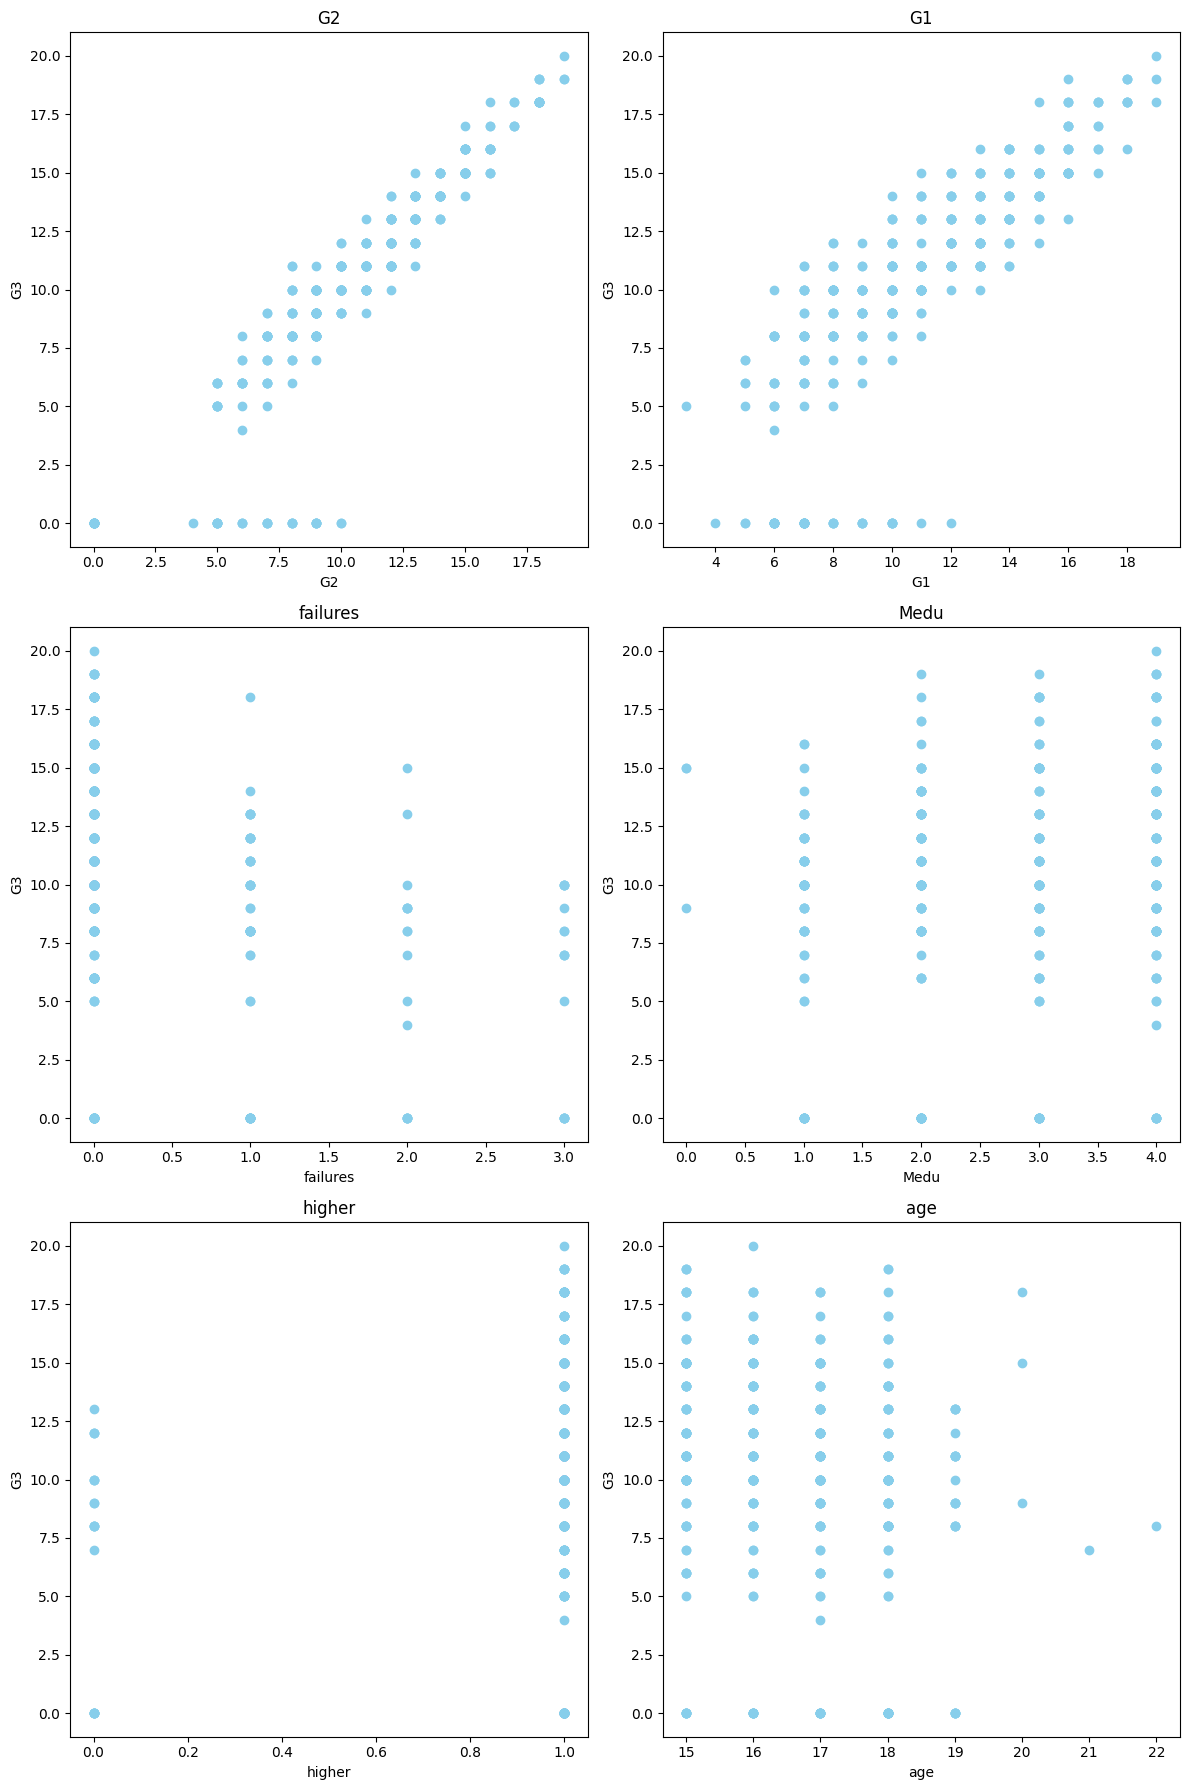

In [32]:
# plot the scatter plot graphs now
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 18))

# First subplot for feature1
plt.subplot(3, 2, 1)  # 3 rows, 2 columns, subplot index 1
plt.scatter(x=data['G2'], y=data['G3'], color='skyblue')
plt.title('G2')
plt.xlabel('G2')
plt.ylabel('G3')

# Second subplot for feature2
plt.subplot(3, 2, 2)  # 3 rows, 2 columns, subplot index 2
plt.scatter(x=data['G1'], y=data['G3'], color='skyblue')
plt.title('G1')
plt.xlabel('G1')
plt.ylabel('G3')

# Third subplot for feature3
plt.subplot(3, 2, 3)  # 3 rows, 2 columns, subplot index 3
plt.scatter(x=data['failures'], y=data['G3'], color='skyblue')
plt.title('failures')
plt.xlabel('failures')
plt.ylabel('G3')

# Fourth subplot for feature4
plt.subplot(3, 2, 4)  # 3 rows, 2 columns, subplot index 4
plt.scatter(x=data['Medu'], y=data['G3'], color='skyblue')
plt.title('Medu')
plt.xlabel('Medu')
plt.ylabel('G3')

# Fifth subplot for feature5
plt.subplot(3, 2, 5)  # 3 rows, 2 columns, subplot index 5
plt.scatter(x=data['higher'], y=data['G3'], color='skyblue')
plt.title('higher')
plt.xlabel('higher')
plt.ylabel('G3')

# Sixth subplot for feature6
plt.subplot(3, 2, 6)  # 3 rows, 2 columns, subplot index 6
plt.scatter(x=data['age'], y=data['G3'], color='skyblue')
plt.title('age')
plt.xlabel('age')
plt.ylabel('G3')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()